# Espace colorimétrique Partie 2

Sur une image, la couleur ne permet pas toujours d'indentfier les éléments pertinents

Pour cela, il est d'usage lors de la conception d'un programme de reconnaissance faciale ou d'image de transformer les images en couleur en images en nuance de gris ou en image noir/blanc

# 1- Conversion d'une image en couleur en nuance de gris

In [1]:
from PIL import Image,ImageOps
import numpy as np
import matplotlib.pyplot as plt

La couleur n'apporte des informations importantes. Elle rend lourd les images et empêches de faire de bonne précision

In [2]:
# chargement de l'image
couleur_papillon = Image.open('papillon.jpeg')

In [3]:
# Récupération des pixels de l'image
couleur_papillon = np.array(couleur_papillon)
print(couleur_papillon)

[[[255 255 248]
  [194 196 183]
  [187 192 169]
  ...
  [167 172 142]
  [167 172 142]
  [167 172 142]]

 [[255 255 250]
  [194 196 183]
  [187 192 170]
  ...
  [167 172 142]
  [167 172 142]
  [167 172 142]]

 [[255 255 250]
  [194 196 183]
  [187 192 170]
  ...
  [167 172 142]
  [167 172 142]
  [167 172 142]]

 ...

 [[255 249 240]
  [143 131 117]
  [150 135 112]
  ...
  [175  90 119]
  [166  82 108]
  [157  73  99]]

 [[255 249 240]
  [143 131 117]
  [150 135 112]
  ...
  [177  93 119]
  [168  84 110]
  [158  74  98]]

 [[255 249 240]
  [143 131 117]
  [150 135 112]
  ...
  [177  93 119]
  [168  84 108]
  [159  75  99]]]


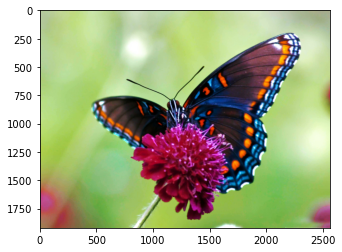

In [4]:
# affichage de l'image
plt.imshow(couleur_papillon)

In [5]:
# resolution de l'image
couleur_papillon.shape

(1920, 2560, 3)

In [6]:
# conversion en nuance de gris avec la librairie sckit image
from skimage.color import rgb2gray

In [7]:
gris_papillon = rgb2gray(couleur_papillon)

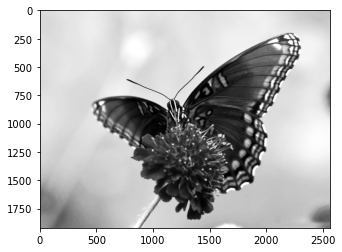

In [8]:
plt.imshow(gris_papillon,cmap='Greys_r')

In [9]:
# Dimensions de l'image
print('Dimension : ', gris_papillon.shape)

Dimension :  (1920, 2560)


La conversion se fait en determinant la moyenne des 3 cannaux RGB pour obtenir un seul cannal 
nuance_gris = 0,21 * CR + 0.72 * CV +  0.07 * CB

La conversion ne change pas la dimension mais le nombre de pixel

In [10]:
print(gris_papillon)

[[0.99802078 0.7632851  0.74227137 ... 0.66186078 0.66186078 0.66186078]
 [0.99858627 0.7632851  0.74255412 ... 0.66186078 0.66186078 0.66186078]
 [0.99858627 0.7632851  0.74255412 ... 0.66186078 0.66186078 0.66186078]
 ...
 [0.97892588 0.51976706 0.53540863 ... 0.43197412 0.39892    0.36362588]
 [0.97892588 0.51976706 0.53540863 ... 0.44205725 0.40676314 0.36698196]
 [0.97892588 0.51976706 0.53540863 ... 0.44205725 0.40619765 0.37090353]]


 ## Conversion d'image en nuance de gris avec PIL

In [11]:
PIL_gray = Image.open('papillon.jpeg')
PIL_gray = ImageOps.grayscale(PIL_gray)
PIL_gray.show()

# 2 - Conversion d'une image en nuance de gris en image noir/blanc : binarisation ou seuillage d'image

La binarisation est le passage de l'image en nuance de gris en image noir et blanc

- Dans le processus de binarisation d'une image une valeur seuil T est choisie


- Tous les pixels avec les valeurs supérieures à ce seuil sont classés comme blancs et tous les autres pixels comme noirs


- L'image est alors séparée en 2 classes représentant le fond de l'image et une autre classe repréentant l'objet d'intètrêt sur l'image 


- La binarisation permet alors de conserver l'information comprise entre O et T. Le reste des informations est par conséquent ignoré

In [12]:
# affichage de pixels de l'image en nuance de gris du papillon
print(gris_papillon)

[[0.99802078 0.7632851  0.74227137 ... 0.66186078 0.66186078 0.66186078]
 [0.99858627 0.7632851  0.74255412 ... 0.66186078 0.66186078 0.66186078]
 [0.99858627 0.7632851  0.74255412 ... 0.66186078 0.66186078 0.66186078]
 ...
 [0.97892588 0.51976706 0.53540863 ... 0.43197412 0.39892    0.36362588]
 [0.97892588 0.51976706 0.53540863 ... 0.44205725 0.40676314 0.36698196]
 [0.97892588 0.51976706 0.53540863 ... 0.44205725 0.40619765 0.37090353]]


In [13]:
# Binarisation avec un seuil de 0.6

In [14]:
gris_papillon = rgb2gray(couleur_papillon)
gris_papillon = gris_papillon > 0.6


In [15]:
print(gris_papillon) 

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]


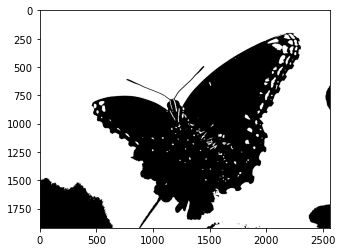

In [17]:
# affichage de l'image binarisée
plt.imshow(gris_papillon,cmap='Greys_r')

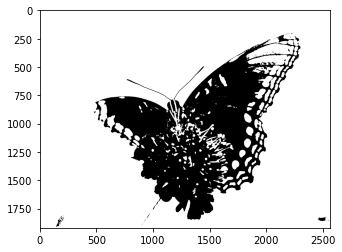

In [21]:
gris_papillon = rgb2gray(couleur_papillon)
gris_papillon = gris_papillon > 0.3
plt.imshow(gris_papillon,cmap='Greys_r')

 # Utilité de la binarisation
 La binarisation est souvent la première étape dans les systèmes de traitement et d'analyse d'image. Elle a pour but de dimunier la quantité d'information présente dans l'image et de ne garder que les informations pertinantes. Les performances des étapes suivantes dans les sytèmes d'analyse et de traitement d'image dépendent fortement du résultat obtenue lors de la binarisation. C'est pour cette raison que la méthode de binarisation utilisé doit être la plus adaptée possible. Elle doit d'une part conservé le maximum d'information utile présente dans l'image de depart et d'autre part éliminer un maximum de bruit présent dans l'image. 

In [22]:
# Exemple
# Chargement et affichage de l'image
ecriture = Image.open('ecriture.jpg')
ecriture = np.array(ecriture)

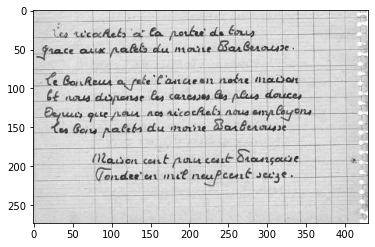

In [23]:
plt.imshow(ecriture)

In [24]:
ecriture.shape

(273, 430, 3)

In [28]:
# Conversion en nuance de gris
gris_ecriture = rgb2gray(ecriture)

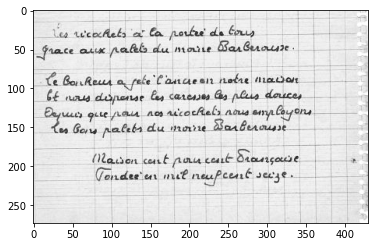

In [29]:
plt.imshow(gris_ecriture,cmap='Greys_r')

- l'objectif ici est de conserver les phrases en ignorant l'arrière plan de l'image qui est la feuille de papier

- les ecrits constituent l'objet d'intèrêt

- la feuille de papier est considéré comme le bruit

In [30]:
# Binarisation avec un seuil de 0.3
binaire_ecriture = gris_ecriture>0.3


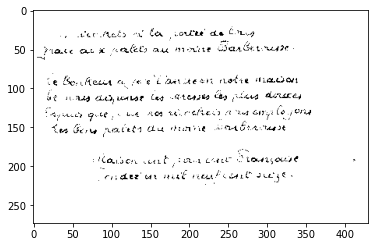

In [31]:
plt.imshow(binaire_ecriture, cmap='Greys_r')

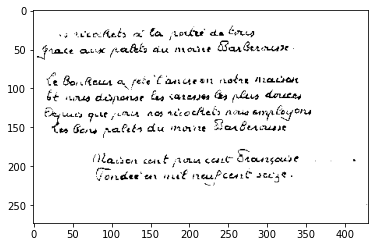

In [36]:
gris_ecriture = rgb2gray(ecriture)
binaire_ecriture = gris_ecriture>0.4
plt.imshow(binaire_ecriture, cmap='Greys_r')

Le seuil optimal est celui qui permet d'effectuer une bonne séparation entre l'objet d'intèrêt et l'arrière plan de l'image. Il existe des méthodes pour détectés ce seuils optimal